In [4]:
import requests

# Define the dataset name
dataset_name = "iloncka/mosquito-species-segmentation-dataset"
API_URL = f"https://datasets-server.huggingface.co/croissant-crumbs?dataset={dataset_name}"


def get_metadata():
    response = requests.get(API_URL)
    return response.json()


metadata = get_metadata()
print(metadata)

{'@context': {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isLiveDataset': 'cr:isLiveDataset', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 'repeated': 'cr:repeated', 'replace': 'cr:replace', 'sc': 'https://schema.org/', 'separator': 'cr:separator', 'source': 'cr

In [5]:
import requests

# Define the dataset name
dataset_name = "iloncka/mosquito-species-classification-dataset"
API_URL = f"https://datasets-server.huggingface.co/croissant-crumbs?dataset={dataset_name}"


def get_metadata():
    response = requests.get(API_URL)
    return response.json()


metadata = get_metadata()
print(metadata)

{'@context': {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isLiveDataset': 'cr:isLiveDataset', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 'repeated': 'cr:repeated', 'replace': 'cr:replace', 'sc': 'https://schema.org/', 'separator': 'cr:separator', 'source': 'cr

In [6]:
from datasets import load_dataset

dataset = load_dataset(
    "iloncka/mosquito-species-classification-dataset", split="test"
)  # , streaming=True, trust_remote_code=True
dataset_head = dataset.take(2)

c:\Users\lenova\CascadeProjects\culicidaelab\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 328/328 [00:00<00:00, 2212.73 examples/s]


In [7]:
dataset_head = dataset.take(2)

In [ ]:
import requests


# Specify the dataset, config, and split you want to query
dataset_name = "iloncka/mosquito-species-classification-dataset"  # e.g., "nyu-mll/glue"
config_name = "default"  # e.g., "cola"
split_name = "test"  # e.g., "train", "validation"

# Construct the API URL
API_URL = (
    f"https://datasets-server.huggingface.co/statistics?dataset={dataset_name}&config={config_name}&split={split_name}"
)


# Function to query the API
def query():
    response = requests.get(API_URL)
    return response.json()


# Fetch and print unique labels
data = query()

In [12]:
def get_dataset_summary(dataset_info):
    """
    Generate a summary of dataset information from the dataset statistics.

    Parameters:
    -----------
    dataset_info : dict
        Dictionary containing dataset statistics and information

    Returns:
    --------
    dict
        Organized summary of the dataset
    """
    summary = {
        "total_samples": dataset_info["num_examples"],
        "columns": {},
        "label_distribution": None,
        "image_info": None,
    }

    # Process each column's statistics
    for column in dataset_info["statistics"]:
        col_name = column["column_name"]
        col_type = column["column_type"]
        stats = column["column_statistics"]

        # Special handling for label column
        if col_type == "string_label":
            summary["label_distribution"] = {
                "num_classes": stats["n_unique"],
                "class_distribution": stats["frequencies"],
            }

        # Special handling for image column
        elif col_type == "image":
            summary["image_info"] = {
                "dimensions": f"{int(stats['min'])}x{int(stats['max'])}",
                "num_images": dataset_info["num_examples"],
            }

        # Store basic column information
        summary["columns"][col_name] = {
            "type": col_type,
            "missing_values": {"count": stats.get("nan_count", 0), "percentage": stats.get("nan_proportion", 0) * 100},
        }

        # Add additional statistics if available
        if "mean" in stats:
            summary["columns"][col_name]["statistics"] = {
                "mean": stats["mean"],
                "std": stats["std"],
                "min": stats["min"],
                "max": stats["max"],
            }

    return summary


# Print summary in a readable format
def print_dataset_summary(summary):
    print(f"Dataset Summary:")
    print(f"Total samples: {summary['total_samples']}")
    print("\nImage Information:")
    if summary["image_info"]:
        print(f"Dimensions: {summary['image_info']['dimensions']}")
        print(f"Number of images: {summary['image_info']['num_images']}")

    print("\nLabel Distribution:")
    if summary["label_distribution"]:
        print(f"Number of classes: {summary['label_distribution']['num_classes']}")
        print("\nSamples per class:")
        for class_name, count in summary["label_distribution"]["class_distribution"].items():
            print(f"  {class_name}: {count}")

    print("\nColumns:")
    for col_name, col_info in summary["columns"].items():
        print(f"\n{col_name}:")
        print(f"  Type: {col_info['type']}")
        print(
            f"  Missing values: {col_info['missing_values']['count']} ({col_info['missing_values']['percentage']:.2f}%)"
        )
        if "statistics" in col_info:
            print(f"  Statistics:")
            print(f"    Mean: {col_info['statistics']['mean']:.2f}")
            print(f"    Std: {col_info['statistics']['std']:.2f}")
            print(f"    Min: {col_info['statistics']['min']}")
            print(f"    Max: {col_info['statistics']['max']}")


# Example usage:
summary = get_dataset_summary(data)  # Replace dataset_info with your response

# Print the summary
print_dataset_summary(summary)

Dataset Summary:
Total samples: 328

Image Information:
Dimensions: 224x224
Number of images: 328

Label Distribution:
Number of classes: 17

Samples per class:
  aedes_koreicus: 16
  aedes_geniculatus: 14
  culiseta_longiareolata: 21
  aedes_aegypti: 36
  culex_quinquefasciatus: 12
  culiseta_annulata: 26
  aedes_triseriatus: 20
  culex_inatomii: 10
  aedes_dorsalis: 13
  anopheles_freeborni: 4
  aedes_canadensis: 23
  aedes_vexans: 23
  culex_tritaeniorhynchus: 21
  anopheles_sinensis: 19
  anopheles_arabiensis: 17
  aedes_albopictus: 36
  culex_pipiens: 17

Columns:

filename:
  Type: string_text
  Missing values: 0 (0.00%)
  Statistics:
    Mean: 137.03
    Std: 18.11
    Min: 115
    Max: 170

image:
  Type: image
  Missing values: 0 (0.00%)
  Statistics:
    Mean: 224.00
    Std: 0.00
    Min: 224
    Max: 224

label:
  Type: string_label
  Missing values: 0 (0.00%)


In [13]:
def find_min_max_classes(dataset_info):
    """
    Find classes with minimum and maximum number of samples in the dataset.

    Parameters:
    -----------
    dataset_info : dict
        Dictionary containing dataset statistics and information

    Returns:
    --------
    dict
        Information about minimum and maximum classes
    """
    # Get the label frequencies from the statistics
    label_stats = None
    for column in dataset_info["statistics"]:
        if column["column_type"] == "string_label":
            label_stats = column["column_statistics"]["frequencies"]
            break

    if not label_stats:
        return None

    # Find min and max classes
    min_class = min(label_stats.items(), key=lambda x: x[1])
    max_class = max(label_stats.items(), key=lambda x: x[1])

    result = {
        "minimum": {"class_name": min_class[0], "sample_count": min_class[1]},
        "maximum": {"class_name": max_class[0], "sample_count": max_class[1]},
        "difference": max_class[1] - min_class[1],
    }

    return result


# Example usage:
min_max_info = find_min_max_classes(data)  # Replace dataset_info with your response

# Print the results in a readable format
if min_max_info:
    print("Class Distribution Analysis:")
    print(f"\nMinimum samples per class:")
    print(f"  Class: {min_max_info['minimum']['class_name']}")
    print(f"  Count: {min_max_info['minimum']['sample_count']} samples")

    print(f"\nMaximum samples per class:")
    print(f"  Class: {min_max_info['maximum']['class_name']}")
    print(f"  Count: {min_max_info['maximum']['sample_count']} samples")

    print(f"\nDifference between max and min: {min_max_info['difference']} samples")

Class Distribution Analysis:

Minimum samples per class:
  Class: anopheles_freeborni
  Count: 4 samples

Maximum samples per class:
  Class: aedes_aegypti
  Count: 36 samples

Difference between max and min: 32 samples


Distribution plot saved as class_distribution.png


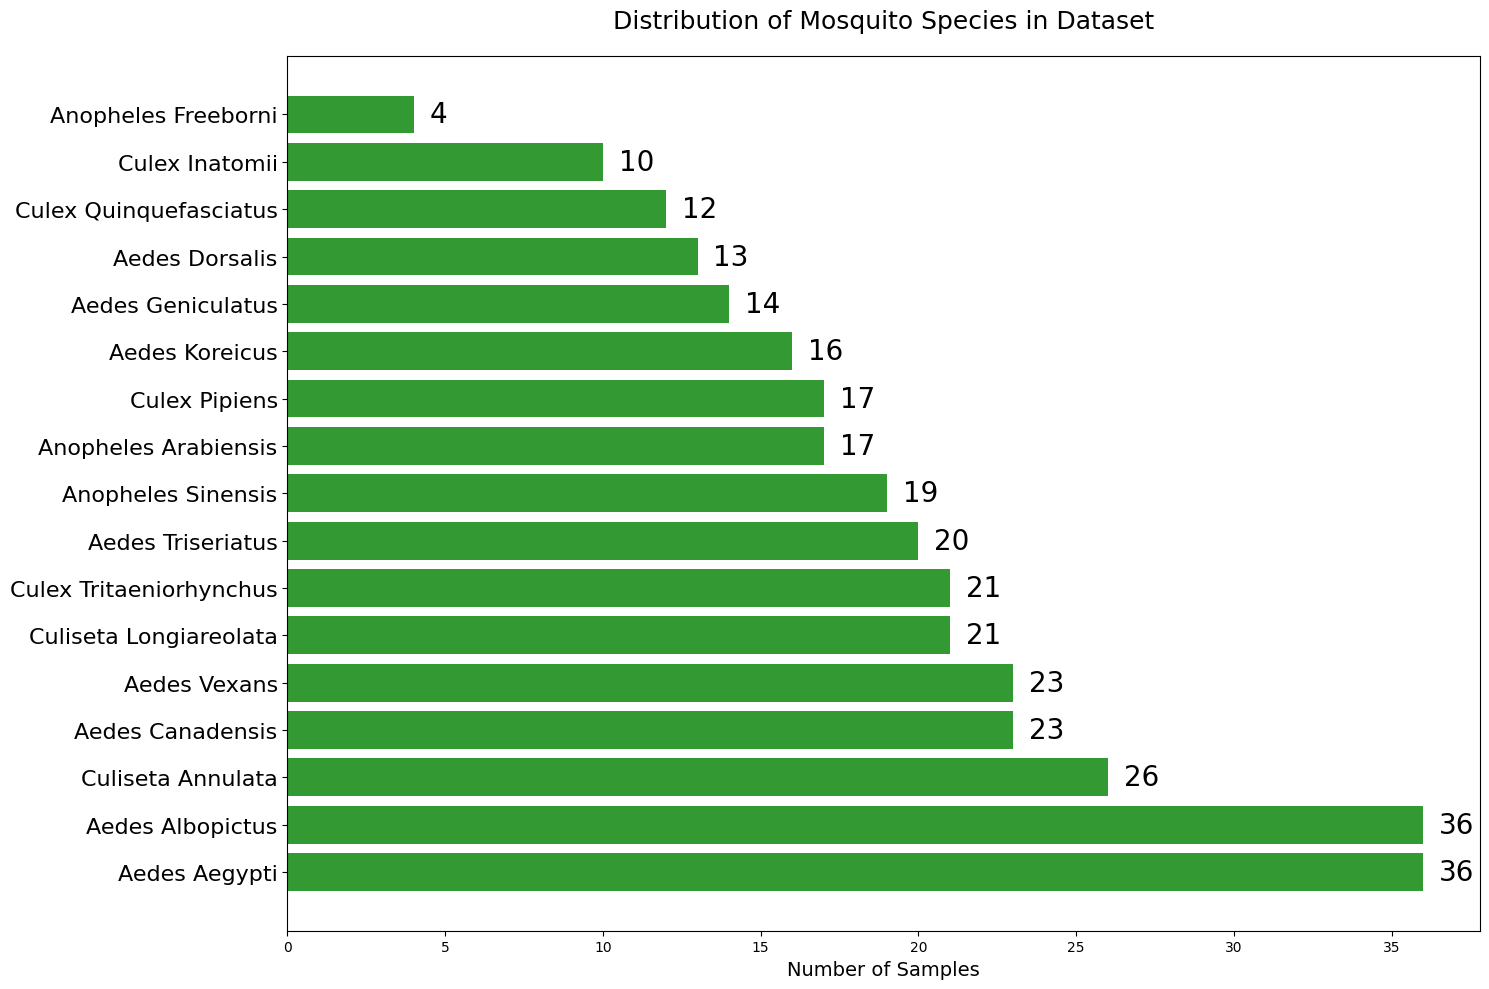

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def create_distribution_plot(
    dataset, dataset_info, color="green", figsize=(15, 10), output_file="class_distribution.png"
):
    """
    Create a horizontal bar plot of class distribution.

    Parameters:
    -----------
    dataset : HuggingFace IterableDataset
        The dataset containing images and labels
    dataset_info : dict
        Dictionary containing dataset statistics and information
    figsize : tuple, default=(15, 10)
        Figure size (width, height)
    output_file : str, default='class_distribution.png'
        Output file name
    """
    # Get label frequencies from dataset_info
    label_stats = None
    for column in dataset_info["statistics"]:
        if column["column_type"] == "string_label":
            label_stats = column["column_statistics"]["frequencies"]
            break

    if not label_stats:
        print("No label statistics found in dataset_info")
        return

    # Sort classes by sample count
    sorted_items = sorted(label_stats.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_items)

    # Create figure with custom size
    fig, ax = plt.subplots(figsize=figsize)

    # Create horizontal bars
    y_pos = np.arange(len(classes))
    ax.barh(y_pos, counts, align="center", color=color, alpha=0.8)

    # Customize the plot
    ax.set_yticks(y_pos)
    # Format class names by replacing underscores with spaces and capitalize
    formatted_classes = [c.replace("_", " ").title() for c in classes]
    ax.set_yticklabels(formatted_classes, fontsize=16)

    # Add value labels on the bars
    for i, v in enumerate(counts):
        ax.text(v + 0.5, i, str(v), va="center", fontsize=20)

    # Add title and labels
    plt.title("Distribution of Mosquito Species in Dataset", pad=20, fontsize=18)
    plt.xlabel("Number of Samples", fontsize=14)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Save the plot
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    print(f"Distribution plot saved as {output_file}")

    # Display the plot
    plt.show()


# Example usage - create both plots
create_distribution_plot(dataset, data)

In [15]:
import torch
import yaml
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


def get_species_map(model, image_path, species_config_path, device="cuda" if torch.cuda.is_available() else "cpu"):
    """
    Generate a species probability map from a trained model for a given image.

    Parameters:
    -----------
    model : torch.nn.Module
        Trained PyTorch model
    image_path : str or Path
        Path to the input image
    species_config_path : str or Path
        Path to the species classes configuration file
    device : str, default='cuda' if available else 'cpu'
        Device to run the model on

    Returns:
    --------
    dict
        Dictionary containing species probabilities and visualization
    """
    # Load species configuration
    with open(species_config_path, "r") as f:
        species_config = yaml.safe_load(f)

    species_map = species_config["species_map"]

    # Prepare model
    model = model.to(device)
    model.eval()

    # Load and preprocess image
    image = Image.open(image_path)

    # Add your image preprocessing here based on your training pipeline
    # Example preprocessing:
    transform = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

    input_tensor = transform(image).unsqueeze(0).to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.softmax(outputs, dim=1)
        probs_np = probabilities[0].cpu().numpy()

    # Create results dictionary
    results = {
        "species_probabilities": {species_map[str(i)]: float(prob) for i, prob in enumerate(probs_np)},
        "top_prediction": species_map[str(np.argmax(probs_np))],
        "confidence": float(np.max(probs_np)),
    }

    # Create visualization
    plt.figure(figsize=(12, 6))

    # Sort probabilities for better visualization
    sorted_probs = sorted(results["species_probabilities"].items(), key=lambda x: x[1], reverse=True)
    species_names, probs = zip(*sorted_probs)

    # Create bar plot
    sns.barplot(x=list(probs), y=[name.replace(" ", "\n") for name in species_names], palette="viridis")

    plt.title("Species Probability Distribution")
    plt.xlabel("Probability")
    plt.tight_layout()

    # Add visualization to results
    results["visualization"] = plt.gcf()
    plt.close()

    return results


def display_species_map(results, save_path=None):
    """
    Display or save the species map visualization.

    Parameters:
    -----------
    results : dict
        Results dictionary from get_species_map
    save_path : str or Path, optional
        Path to save the visualization
    """
    # Print prediction results
    print(f"Top prediction: {results['top_prediction']}")
    print(f"Confidence: {results['confidence']:.2%}\n")

    print("All species probabilities:")
    for species, prob in sorted(results["species_probabilities"].items(), key=lambda x: x[1], reverse=True):
        print(f"{species}: {prob:.2%}")

    # Display visualization
    plt.figure(results["visualization"].number)
    if save_path:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.show()


# Example usage:
"""
# Load your trained model
model = YourModelClass()
model.load_state_dict(torch.load('path_to_model_weights.pth'))

# Get species map for an image
results = get_species_map(
    model=model,
    image_path='path_to_image.jpg',
    species_config_path='path_to_species_config.yaml'
)

# Display or save results
display_species_map(results, save_path='species_map.png')
"""

"\n# Load your trained model\nmodel = YourModelClass()\nmodel.load_state_dict(torch.load('path_to_model_weights.pth'))\n\n# Get species map for an image\nresults = get_species_map(\n    model=model,\n    image_path='path_to_image.jpg',\n    species_config_path='path_to_species_config.yaml'\n)\n\n# Display or save results\ndisplay_species_map(results, save_path='species_map.png')\n"

Tree visualization saved as tree_distribution.png


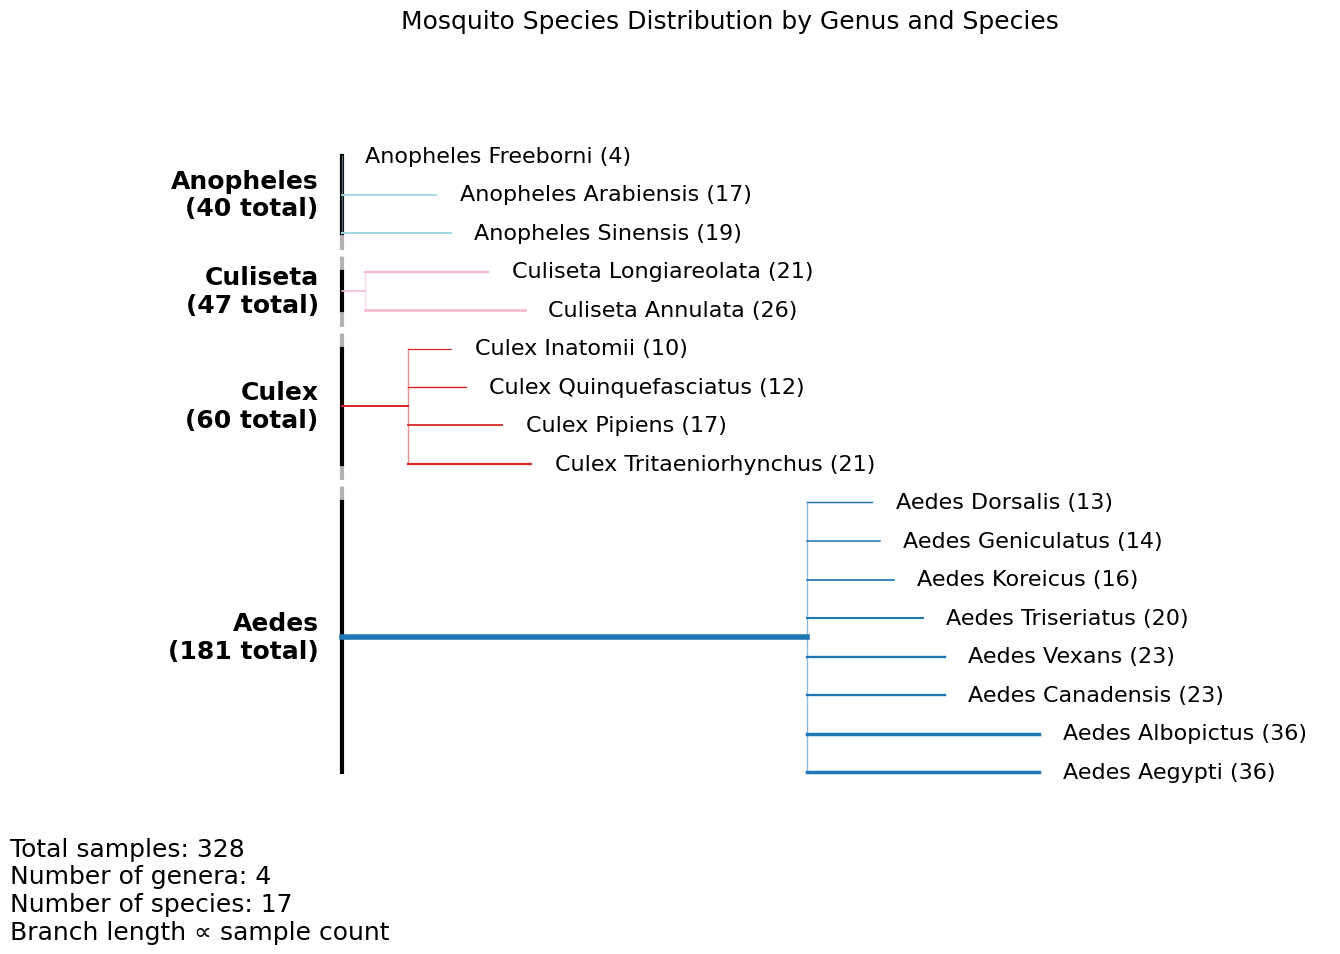

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


def create_tree_visualization(dataset_info, figsize=(15, 10), output_file="tree_distribution.png"):
    """
    Create a tree-like visualization with branch lengths proportional to species count.
    """
    # Get label frequencies from dataset_info
    label_stats = None
    for column in dataset_info["statistics"]:
        if column["column_type"] == "string_label":
            label_stats = column["column_statistics"]["frequencies"]
            break

    if not label_stats:
        print("No label statistics found in dataset_info")
        return

    # Group species by genus
    genus_groups = defaultdict(list)
    genus_totals = defaultdict(int)

    for species, count in label_stats.items():
        genus = species.split("_")[0]
        genus_groups[genus].append((species, count))
        genus_totals[genus] += count

    # Sort genera by total count
    sorted_genera = sorted(genus_totals.items(), key=lambda x: x[1], reverse=True)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Calculate scaling factors
    max_count = max(label_stats.values())
    min_count = min(label_stats.values())
    max_genus_count = max(genus_totals.values())
    min_genus_count = min(genus_totals.values())

    # Calculate positions
    total_species = sum(len(group) for group in genus_groups.values())
    y_positions = np.linspace(0.1, 0.9, total_species)
    trunk_x = 0.15  # Position of main vertical line
    max_branch_length = 0.4  # Maximum branch length

    current_y_index = 0
    text_offset = 0.02

    # Color map for genera
    colors = plt.cm.tab20(np.linspace(0, 1, len(genus_groups)))

    # Draw main trunk segments between genera
    # Draw main trunk segments between genera
    prev_end = None
    for (genus, _), color in zip(sorted_genera, colors):
        species_count = len(genus_groups[genus])
        start_y = y_positions[current_y_index]
        end_y = y_positions[current_y_index + species_count - 1]

        if prev_end is not None:
            # Draw connecting segment
            mid_y = (prev_end + start_y) / 2
            ax.plot([trunk_x, trunk_x], [prev_end, start_y], color="k", linewidth=3, alpha=0.3, linestyle="--")

        # Draw main trunk segment for this genus
        ax.plot([trunk_x, trunk_x], [start_y, end_y], color="k", linewidth=3)

        prev_end = end_y
        current_y_index += species_count

    # Reset current_y_index for species drawing
    current_y_index = 0

    # Draw branches for each genus
    for (genus, total_count), color in zip(sorted_genera, colors):
        species_list = genus_groups[genus]
        species_count = len(species_list)

        # Calculate genus branch position and length
        genus_y = np.mean(y_positions[current_y_index : current_y_index + species_count])
        genus_branch_length = max_branch_length * (total_count - min_genus_count) / (max_genus_count - min_genus_count)

        # Calculate line thickness based on count
        thickness = 1 + 3 * (total_count - min_genus_count) / (max_genus_count - min_genus_count)

        # Draw genus branch
        ax.plot([trunk_x, trunk_x + genus_branch_length], [genus_y, genus_y], "-", color=color, linewidth=thickness)

        # Add genus name
        ax.text(
            trunk_x - 0.02,
            genus_y,
            f"{genus.title()}\n({total_count} total)",
            horizontalalignment="right",
            verticalalignment="center",
            fontsize=18,
            fontweight="bold",
        )

        # Draw vertical connector for species
        if species_count > 1:
            ax.plot(
                [trunk_x + genus_branch_length, trunk_x + genus_branch_length],
                [y_positions[current_y_index], y_positions[current_y_index + species_count - 1]],
                "-",
                color=color,
                linewidth=1,
                alpha=0.5,
            )

        # Draw species branches
        for i, (species, count) in enumerate(sorted(species_list, key=lambda x: x[1], reverse=True)):
            y_pos = y_positions[current_y_index + i]

            # Calculate species branch length based on count
            species_branch_length = max_branch_length * 0.5 * (count - min_count) / (max_count - min_count)

            # Draw species branch
            species_thickness = 0.5 + 2 * (count - min_count) / (max_count - min_count)
            ax.plot(
                [trunk_x + genus_branch_length, trunk_x + genus_branch_length + species_branch_length],
                [y_pos, y_pos],
                "-",
                color=color,
                linewidth=species_thickness,
            )

            # Add species name with genus
            species_name = species.replace("_", " ").title()  # Include full name with genus
            ax.text(
                trunk_x + genus_branch_length + species_branch_length + text_offset,
                y_pos,
                f"{species_name} ({count})",
                verticalalignment="center",
                fontsize=16,
            )

        current_y_index += species_count

    # Customize the plot
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis("off")

    # Add title
    plt.suptitle("Mosquito Species Distribution by Genus and Species", y=0.95, fontsize=18)

    # Add total samples count and legend
    total_samples = sum(label_stats.values())
    plt.figtext(
        0.02,
        0.02,
        f"Total samples: {total_samples}\n"
        f"Number of genera: {len(genus_groups)}\n"
        f"Number of species: {len(label_stats)}\n"
        f"Branch length ∝ sample count",
        fontsize=18,
    )

    # Save the plot
    plt.savefig(output_file, dpi=300, bbox_inches="tight")
    print(f"Tree visualization saved as {output_file}")

    # Display the plot
    plt.show()


# Example usage
create_tree_visualization(data)